# Detectron Mask R-CNN extended part1
# Name: Shengwei Huang, Wentai Liu
# Net Id: sh6203, wl2446

This is a [Mask R-CNN](https://arxiv.org/abs/1703.06870) colab notebook using [facebookresearch/Detectron](https://github.com/facebookresearch/Detectron).


For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install Detectron

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/facebookresearch/Detectron.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone
  !git clone -q --depth 1 $git_repo_url
  # dependencies
  !cd $project_name && pip install -q -r requirements.txt
  # build
  !cd $project_name && make
# test Detectron
!python $project_name/detectron/tests/test_spatial_narrow_as_op.py 

import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

from IPython.display import clear_output

     |████████████████████████████████| 375 kB 4.3 MB/s 
python setup.py develop --user
Compiling detectron/utils/cython_bbox.pyx because it changed.
Compiling detectron/utils/cython_nms.pyx because it changed.
[1/2] Cythonizing detectron/utils/cython_bbox.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_bbox.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
[2/2] Cythonizing detectron/utils/cython_nms.pyx
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Detectron/detectron/utils/cython_nms.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running develop
running egg_info
creating Detectron.egg-info
writing Detectron.egg-info/PKG-INFO
writ

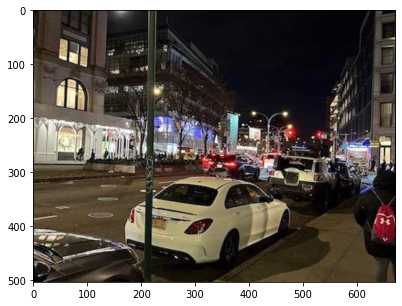

In [ ]:
IMAGE_URL = 'https://raw.githubusercontent.com/sh6203/MLfinalprojectPic/main/SohoStreet.jpg'

image_file = basename(IMAGE_URL)
image_file_ext = splitext(image_file)[1][1:]
images_dir = 'images'
!mkdir -p $images_dir && rm -rf $images_dir/*
!wget -q -O $images_dir/$image_file $IMAGE_URL

plt.figure(figsize=(10, 5))
plt.imshow(matplotlib.image.imread(join(images_dir, image_file)))

#mask rcnn X model

In [ ]:
#mask rcnn X model
MODEL_CFG = 'e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'
# X-152-32x8d-FPN-IN5k -> OUT OF MEMORY ON COLAB!
# MODEL_CFG = 'e2e_mask_rcnn_X-152-32x8d-FPN-IN5k_1.44x.yaml'
# PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/37129812/12_2017_baselines/e2e_mask_rcnn_X-152-32x8d-FPN-IN5k_1.44x.yaml.09_35_36.8pzTQKYK/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/maskrcnnXmodel/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwVtEvg/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/36494496/12_2017_baselines/e2e_mask_rcnn_X-101-64x4d-FPN_1x.yaml.07_50_11.fkwV

#mask rcnn R model

In [ ]:
#mask rcnn R model
MODEL_CFG = 'e2e_mask_rcnn_R-101-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/35861795/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_1x.yaml.02_31_37.KqyEK4tT/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/maskrcnnRmodel/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/35861795/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_1x.yaml.02_31_37.KqyEK4tT/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/35861795/12_2017_baselines/e2e_mask_rcnn_R-101-FPN_1x.yaml.02_31_37.KqyEK4tT/output/

#keypoint rcnn X model

In [ ]:
#keypoint rcnn X model
MODEL_CFG = 'e2e_keypoint_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/37732355/12_2017_baselines/e2e_keypoint_rcnn_X-101-64x4d-FPN_1x.yaml.16_56_16.yv4t4W8N/output/train/keypoints_coco_2014_train%3Akeypoints_coco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/keypointrcnnXmodel/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/37732355/12_2017_baselines/e2e_keypoint_rcnn_X-101-64x4d-FPN_1x.yaml.16_56_16.yv4t4W8N/output/train/keypoints_coco_2014_train%3Akeypoints_coco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/37732355/12_2017_baselines/e2e_keypoint_rcnn_X-101-64x

#keypoint rcnn R model

In [ ]:
#keypoint rcnn R model
MODEL_CFG = 'e2e_keypoint_rcnn_R-101-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/37697946/12_2017_baselines/e2e_keypoint_rcnn_R-101-FPN_1x.yaml.08_45_06.Y14KqbST/output/train/keypoints_coco_2014_train%3Akeypoints_coco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/keypointrcnnRmodel/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/37697946/12_2017_baselines/e2e_keypoint_rcnn_R-101-FPN_1x.yaml.08_45_06.Y14KqbST/output/train/keypoints_coco_2014_train%3Akeypoints_coco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/37697946/12_2017_baselines/e2e_keypoint_rcnn_R-101-FPN_1x.ya

#faster rcnn X model

In [ ]:
#faster rcnn X model
MODEL_CFG = 'e2e_faster_rcnn_X-101-64x4d-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/35858015/12_2017_baselines/e2e_faster_rcnn_X-101-64x4d-FPN_1x.yaml.01_40_54.1xc565DE/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/fasterrcnnXmodel/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/35858015/12_2017_baselines/e2e_faster_rcnn_X-101-64x4d-FPN_1x.yaml.01_40_54.1xc565DE/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/35858015/12_2017_baselines/e2e_faster_rcnn_X-101-64x4d-FPN_1x.yaml.01_40_54.

#faster rcnn R model

In [ ]:
#faster rcnn R model
MODEL_CFG = 'e2e_faster_rcnn_R-101-FPN_1x.yaml'
PRETRAINED_MODEL_URL = 'https://dl.fbaipublicfiles.com/detectron/35857890/12_2017_baselines/e2e_faster_rcnn_R-101-FPN_1x.yaml.01_38_50.sNxI7sX7/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl'

!cd $project_name && python tools/infer_simple.py \
    --cfg configs/12_2017_baselines/$MODEL_CFG \
    --wts $PRETRAINED_MODEL_URL \
    --thresh 0.7 \
    --output-dir ../output/fasterrcnnRmodel/ --output-ext png --always-out \
    --image-ext $image_file_ext \
    ../$images_dir

Found Detectron ops lib: /usr/local/lib/python3.7/dist-packages/torch/lib/libcaffe2_detectron_ops_gpu.so
[E init_intrinsics_check.cc:43] CPU feature avx is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature avx2 is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
[E init_intrinsics_check.cc:43] CPU feature fma is present on your machine, but the Caffe2 binary is not compiled with it. It means you may not get the full speed of your CPU.
INFO io.py: 112: Downloading remote file https://dl.fbaipublicfiles.com/detectron/35857890/12_2017_baselines/e2e_faster_rcnn_R-101-FPN_1x.yaml.01_38_50.sNxI7sX7/output/train/coco_2014_train%3Acoco_2014_valminusminival/generalized_rcnn/model_final.pkl to /tmp/detectron-download-cache/35857890/12_2017_baselines/e2e_faster_rcnn_R-101-FPN_1x.yaml.01_38_50.sNxI7sX7/out

Now visualize the result:

#mask rcnn X:

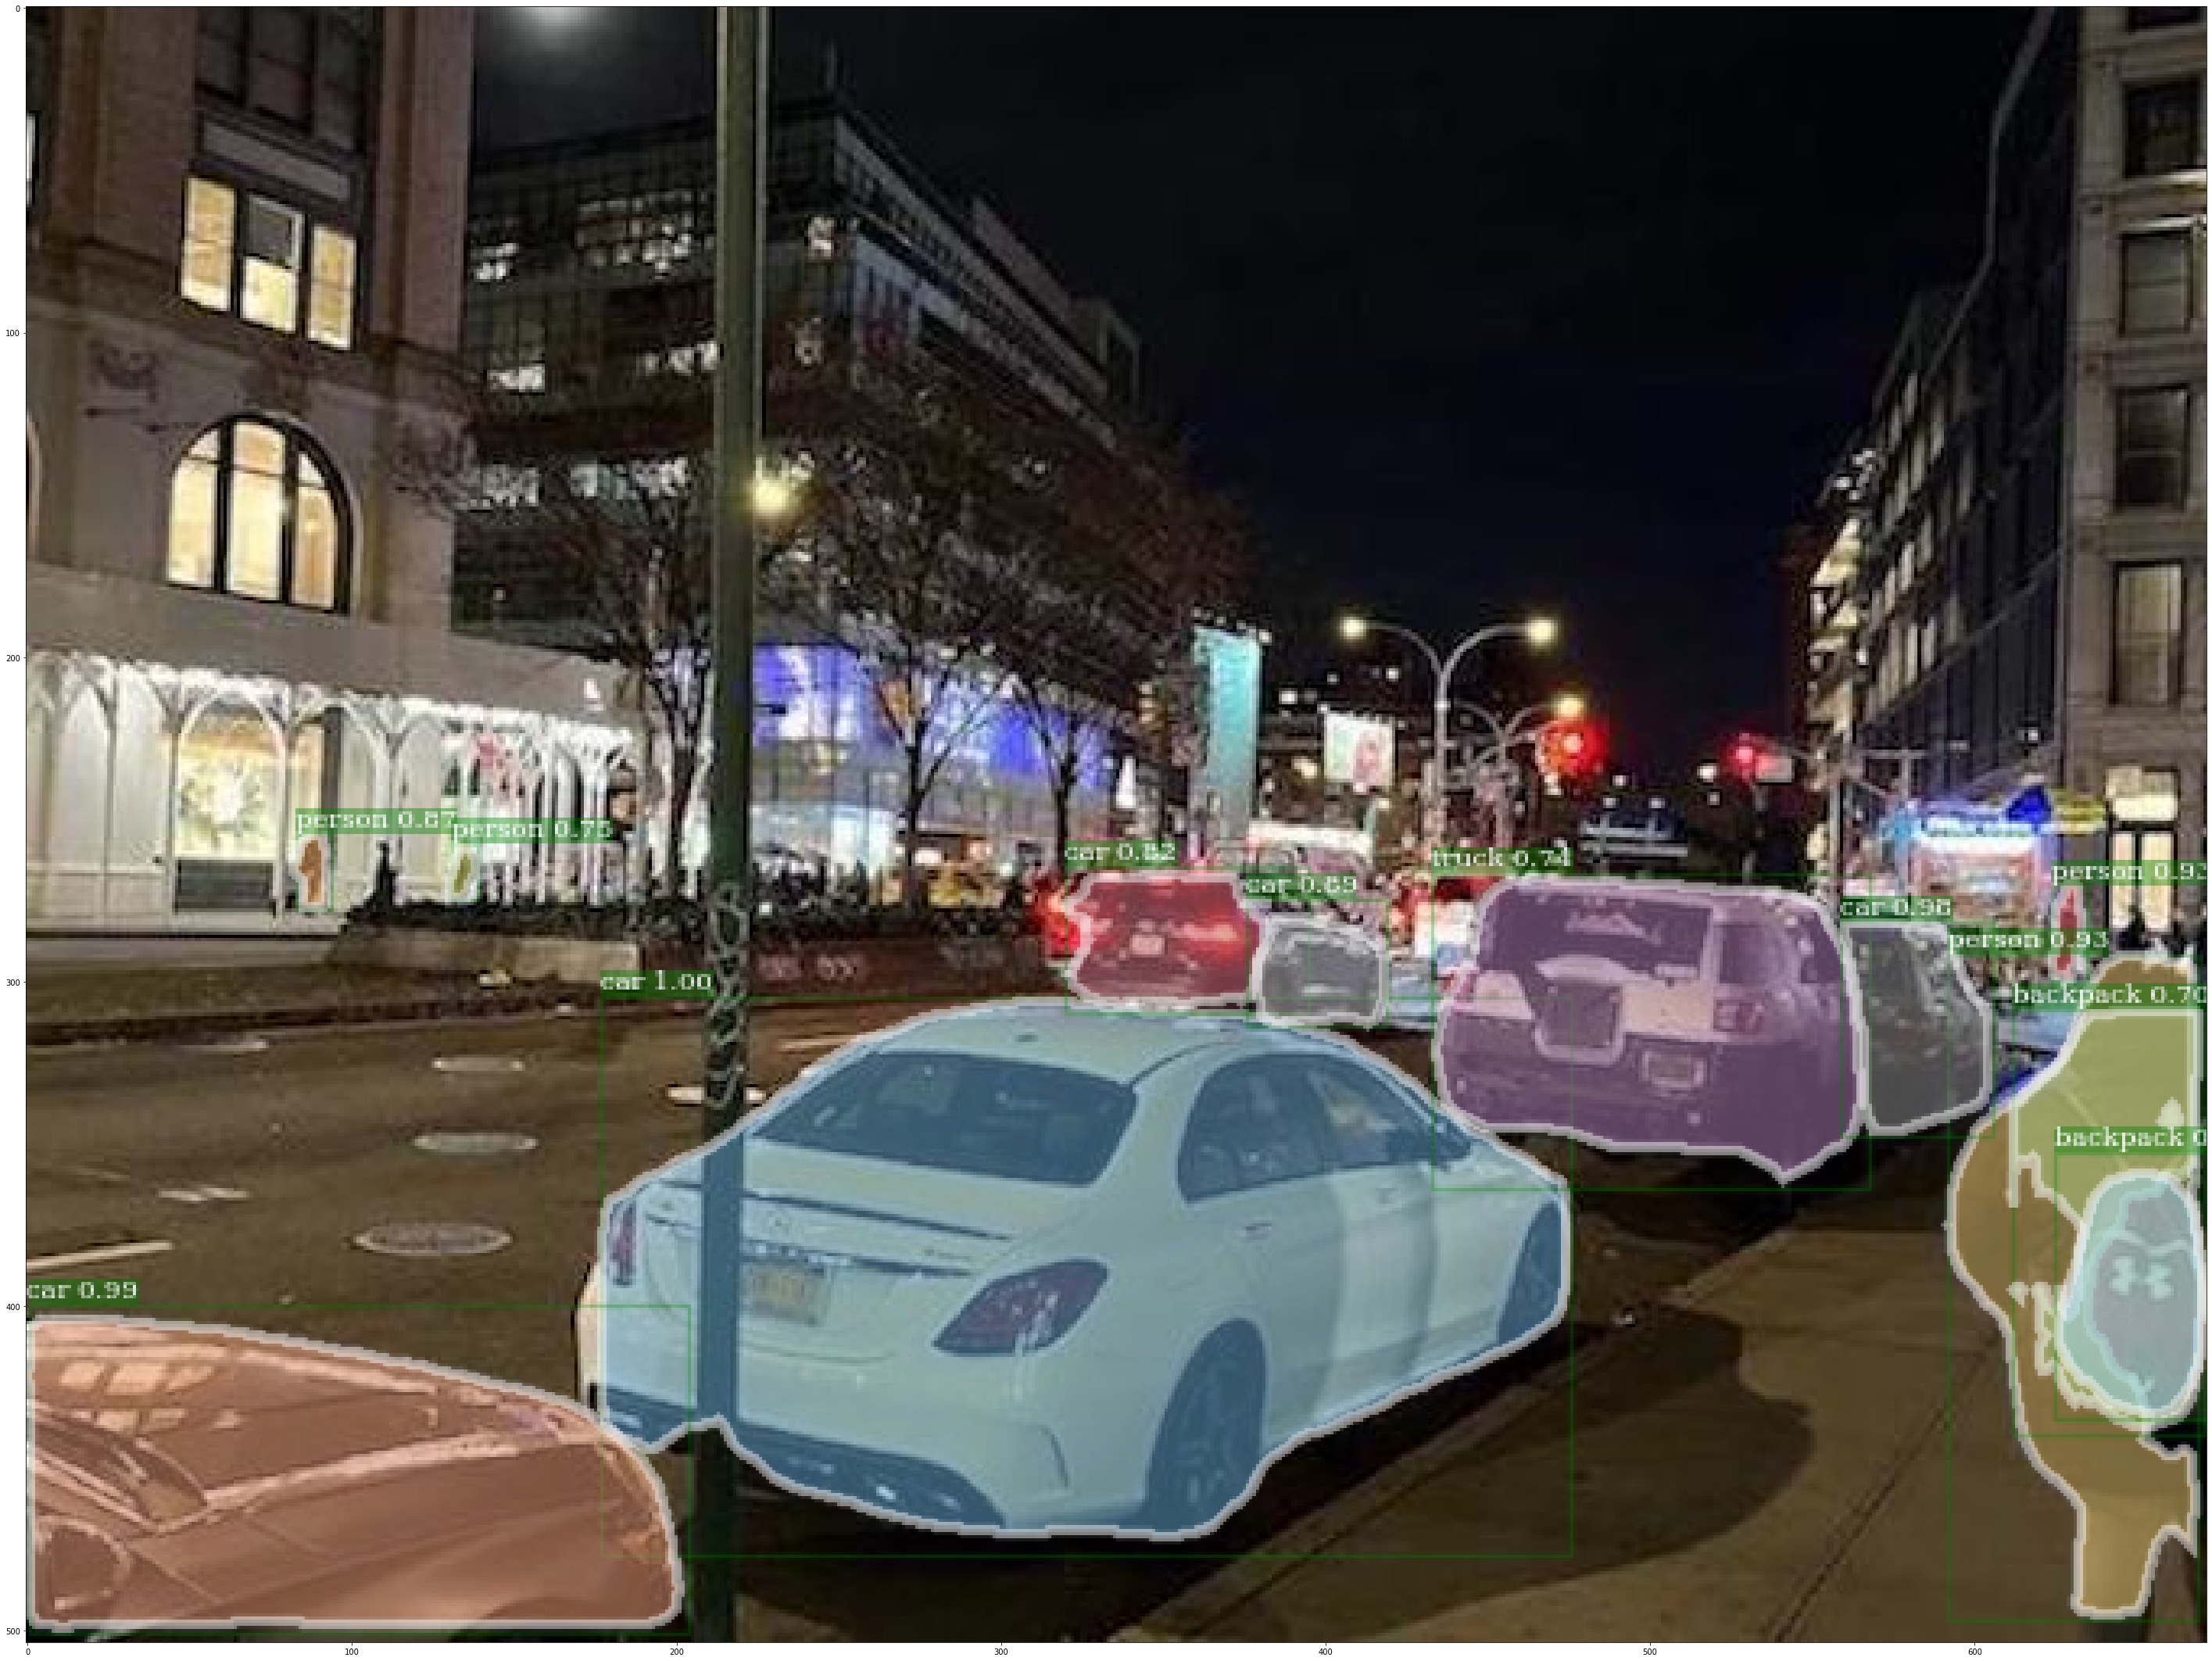

In [ ]:
#show mask rcnn X graph
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/maskrcnnXmodel/%s.png' % image_file))

#mask rcnn R:

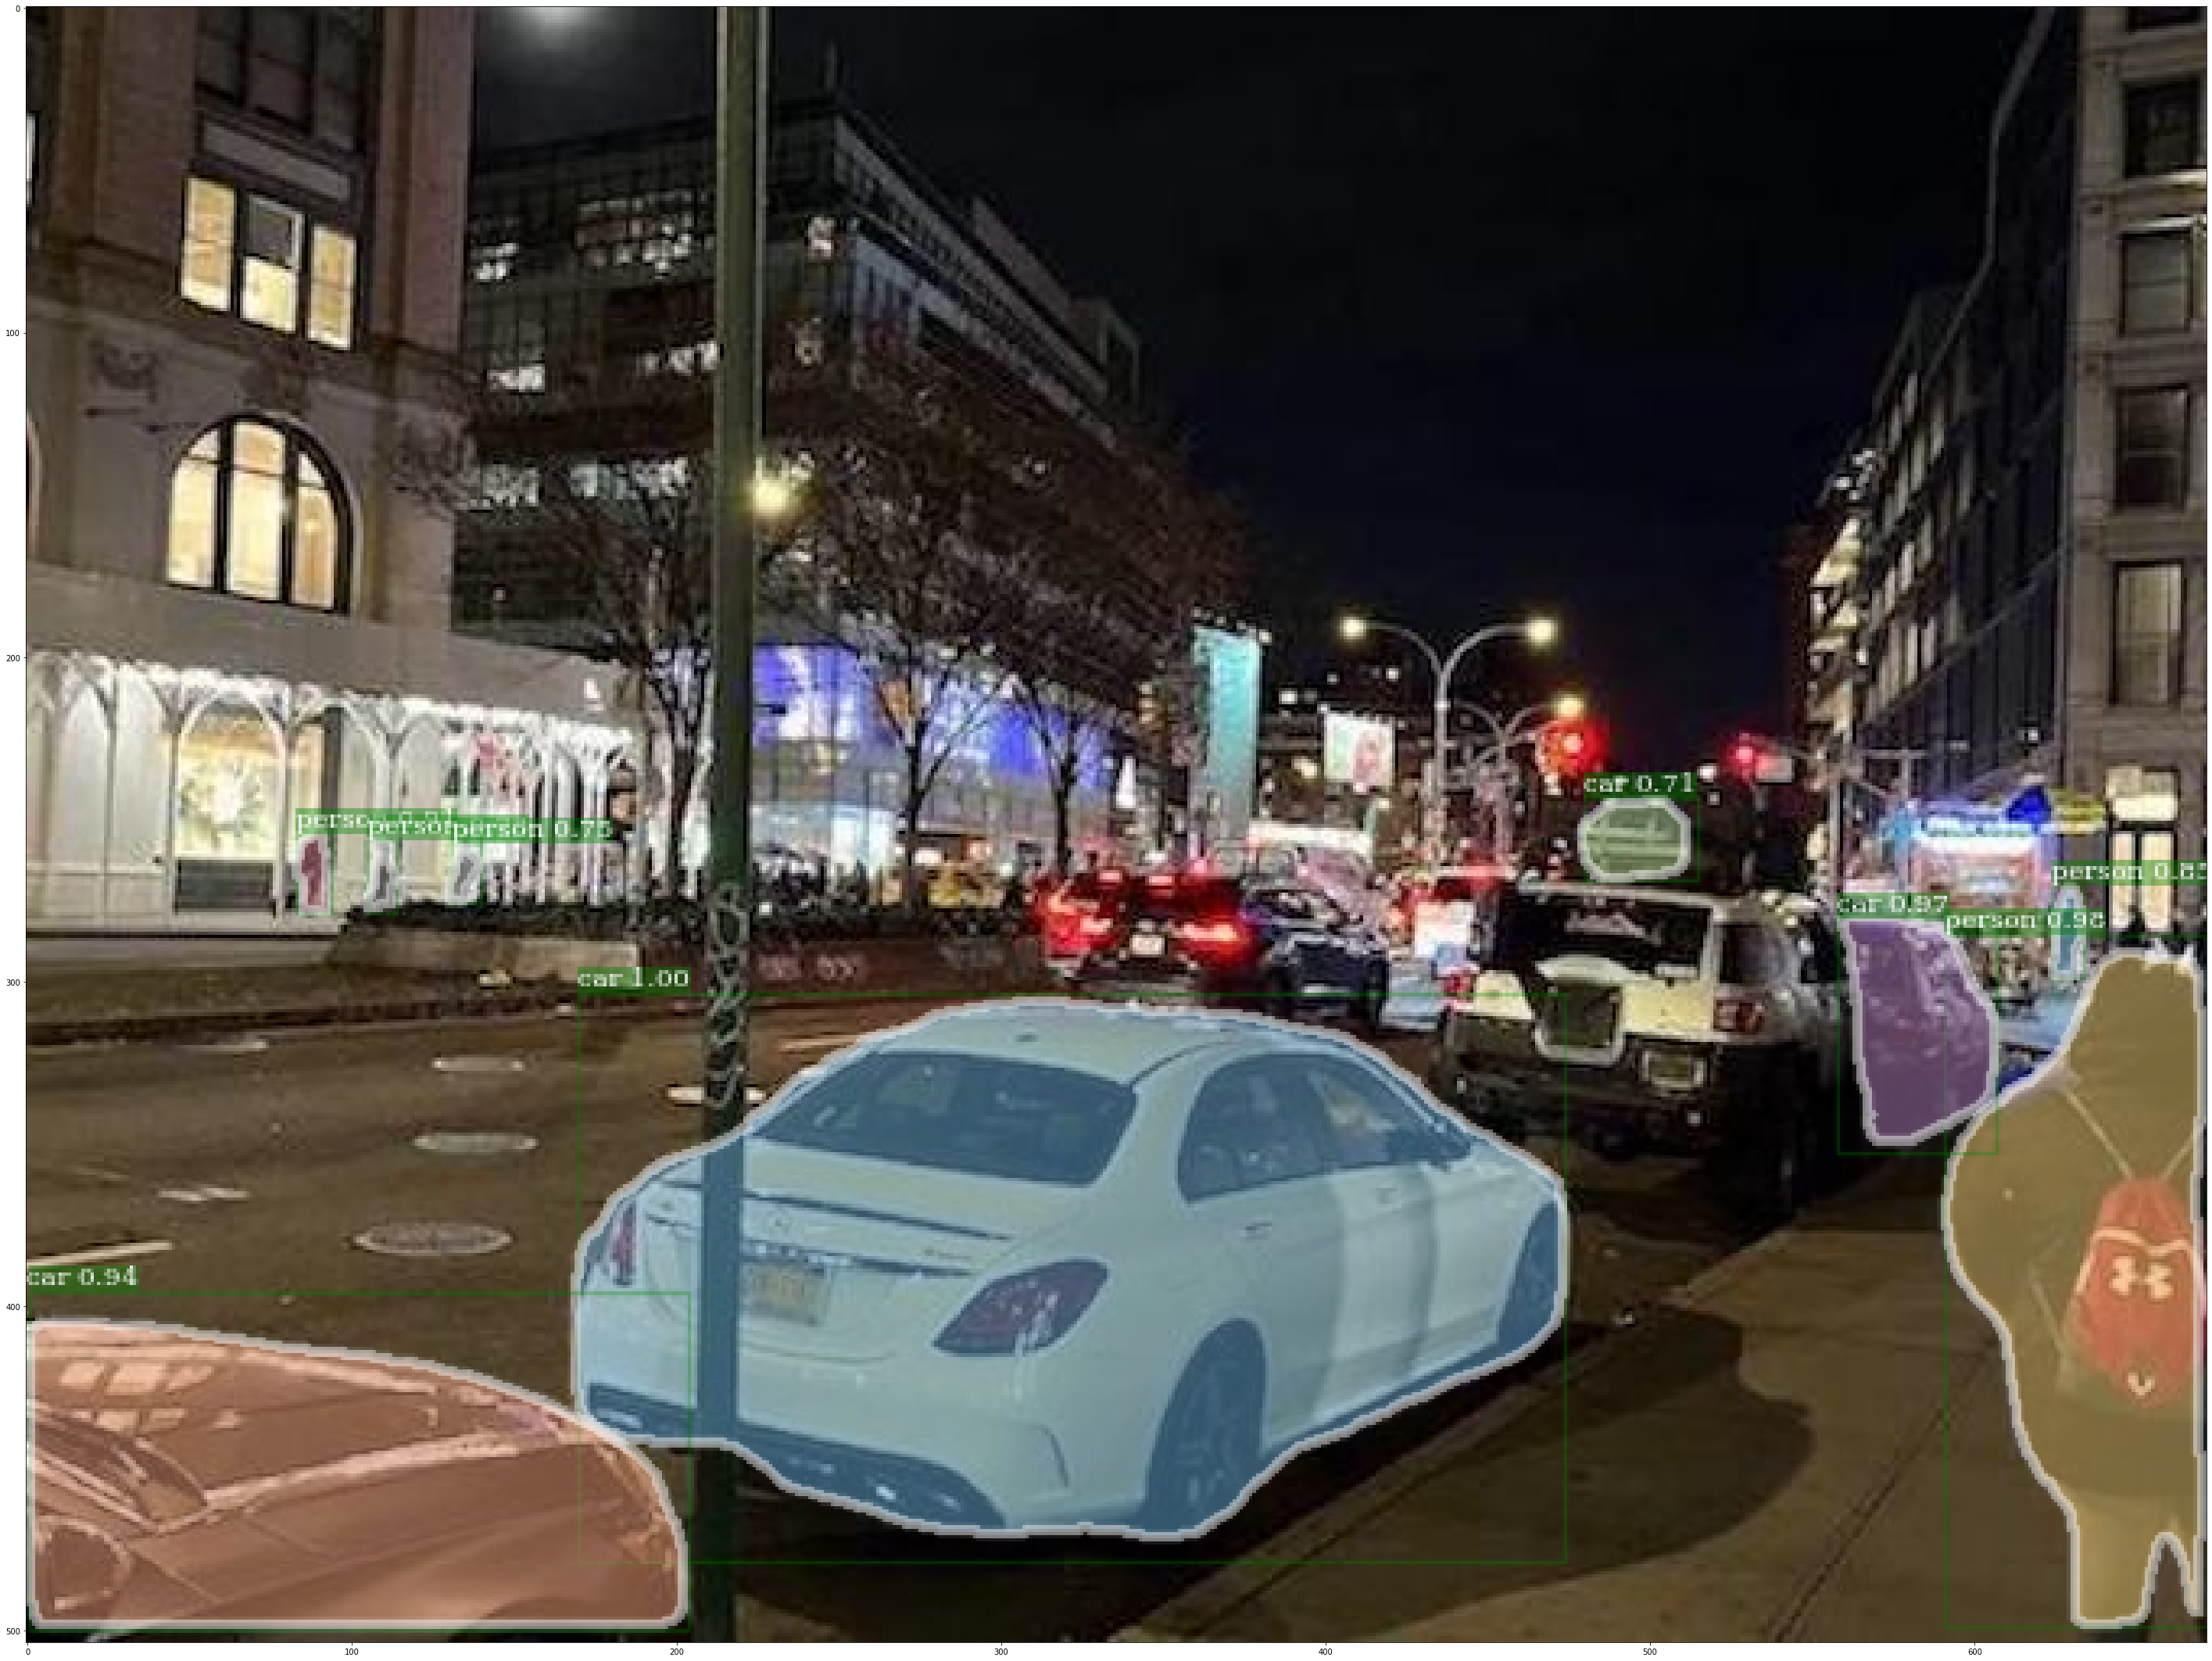

In [ ]:
#show mask rcnn R graph
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/maskrcnnRmodel/%s.png' % image_file))

#keypoint rcnn X:

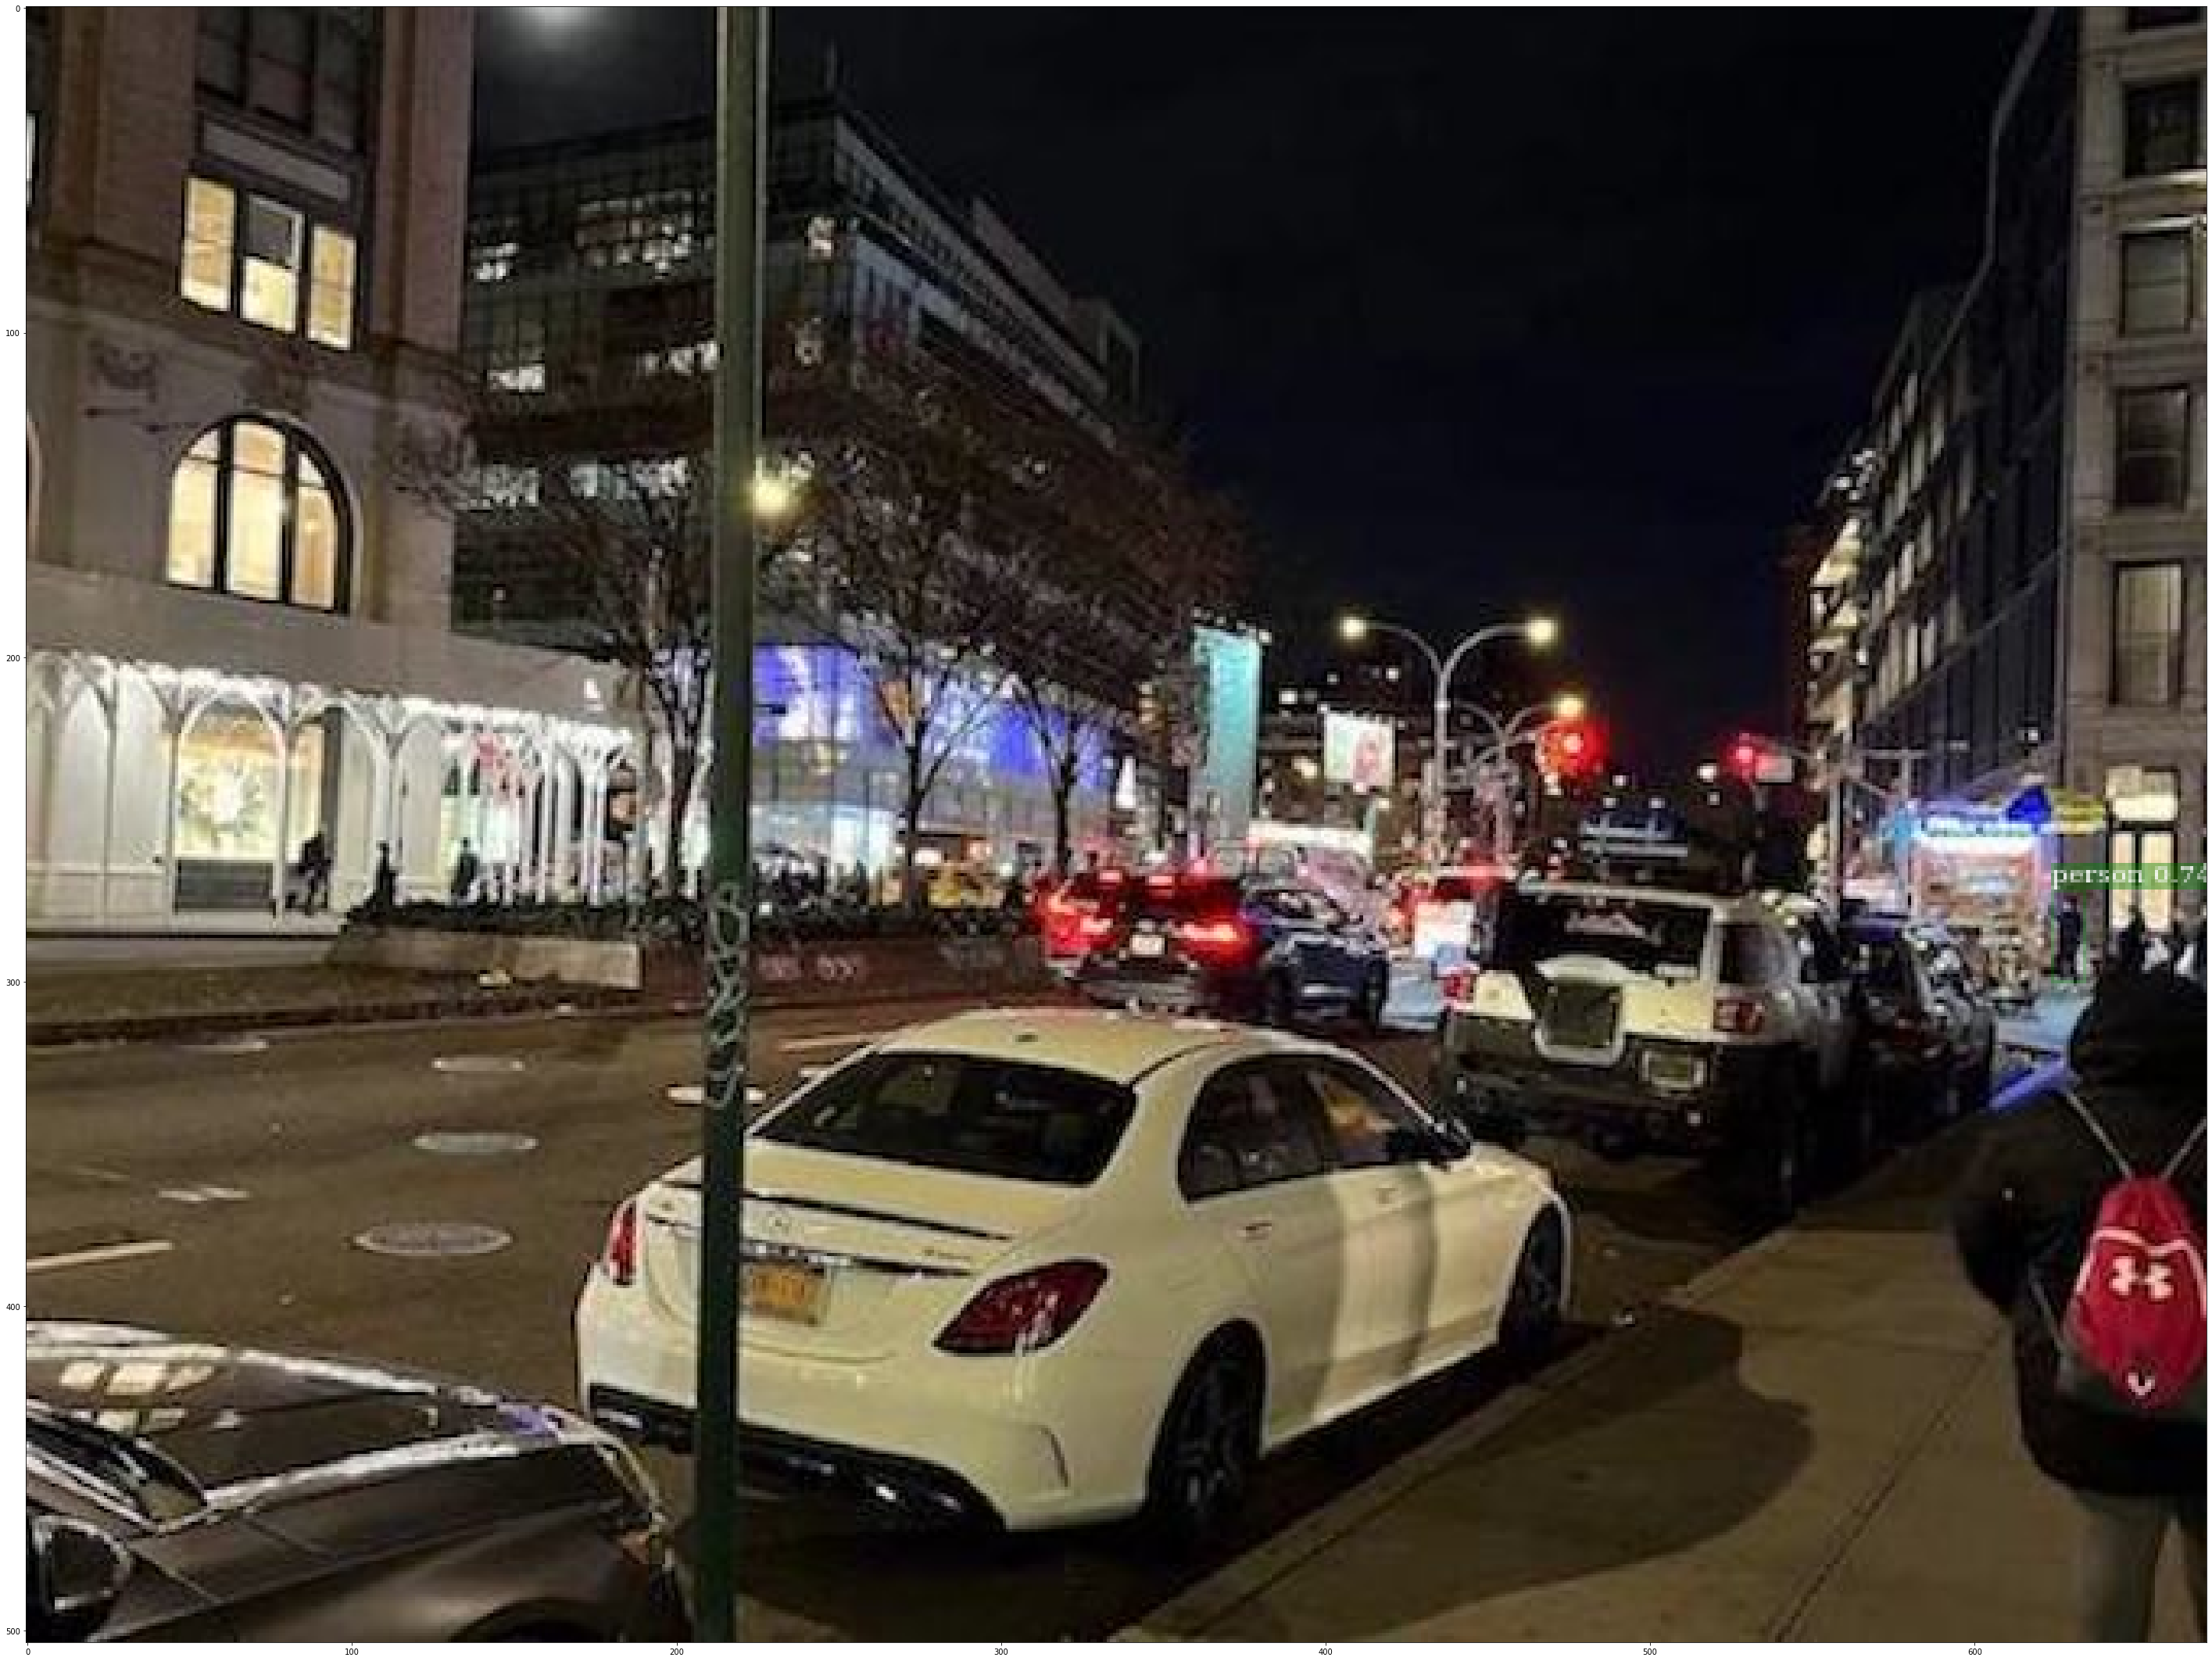

In [ ]:
#show keypoint rcnn X graph
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/keypointrcnnXmodel/%s.png' % image_file))

#keypoint rcnn R:

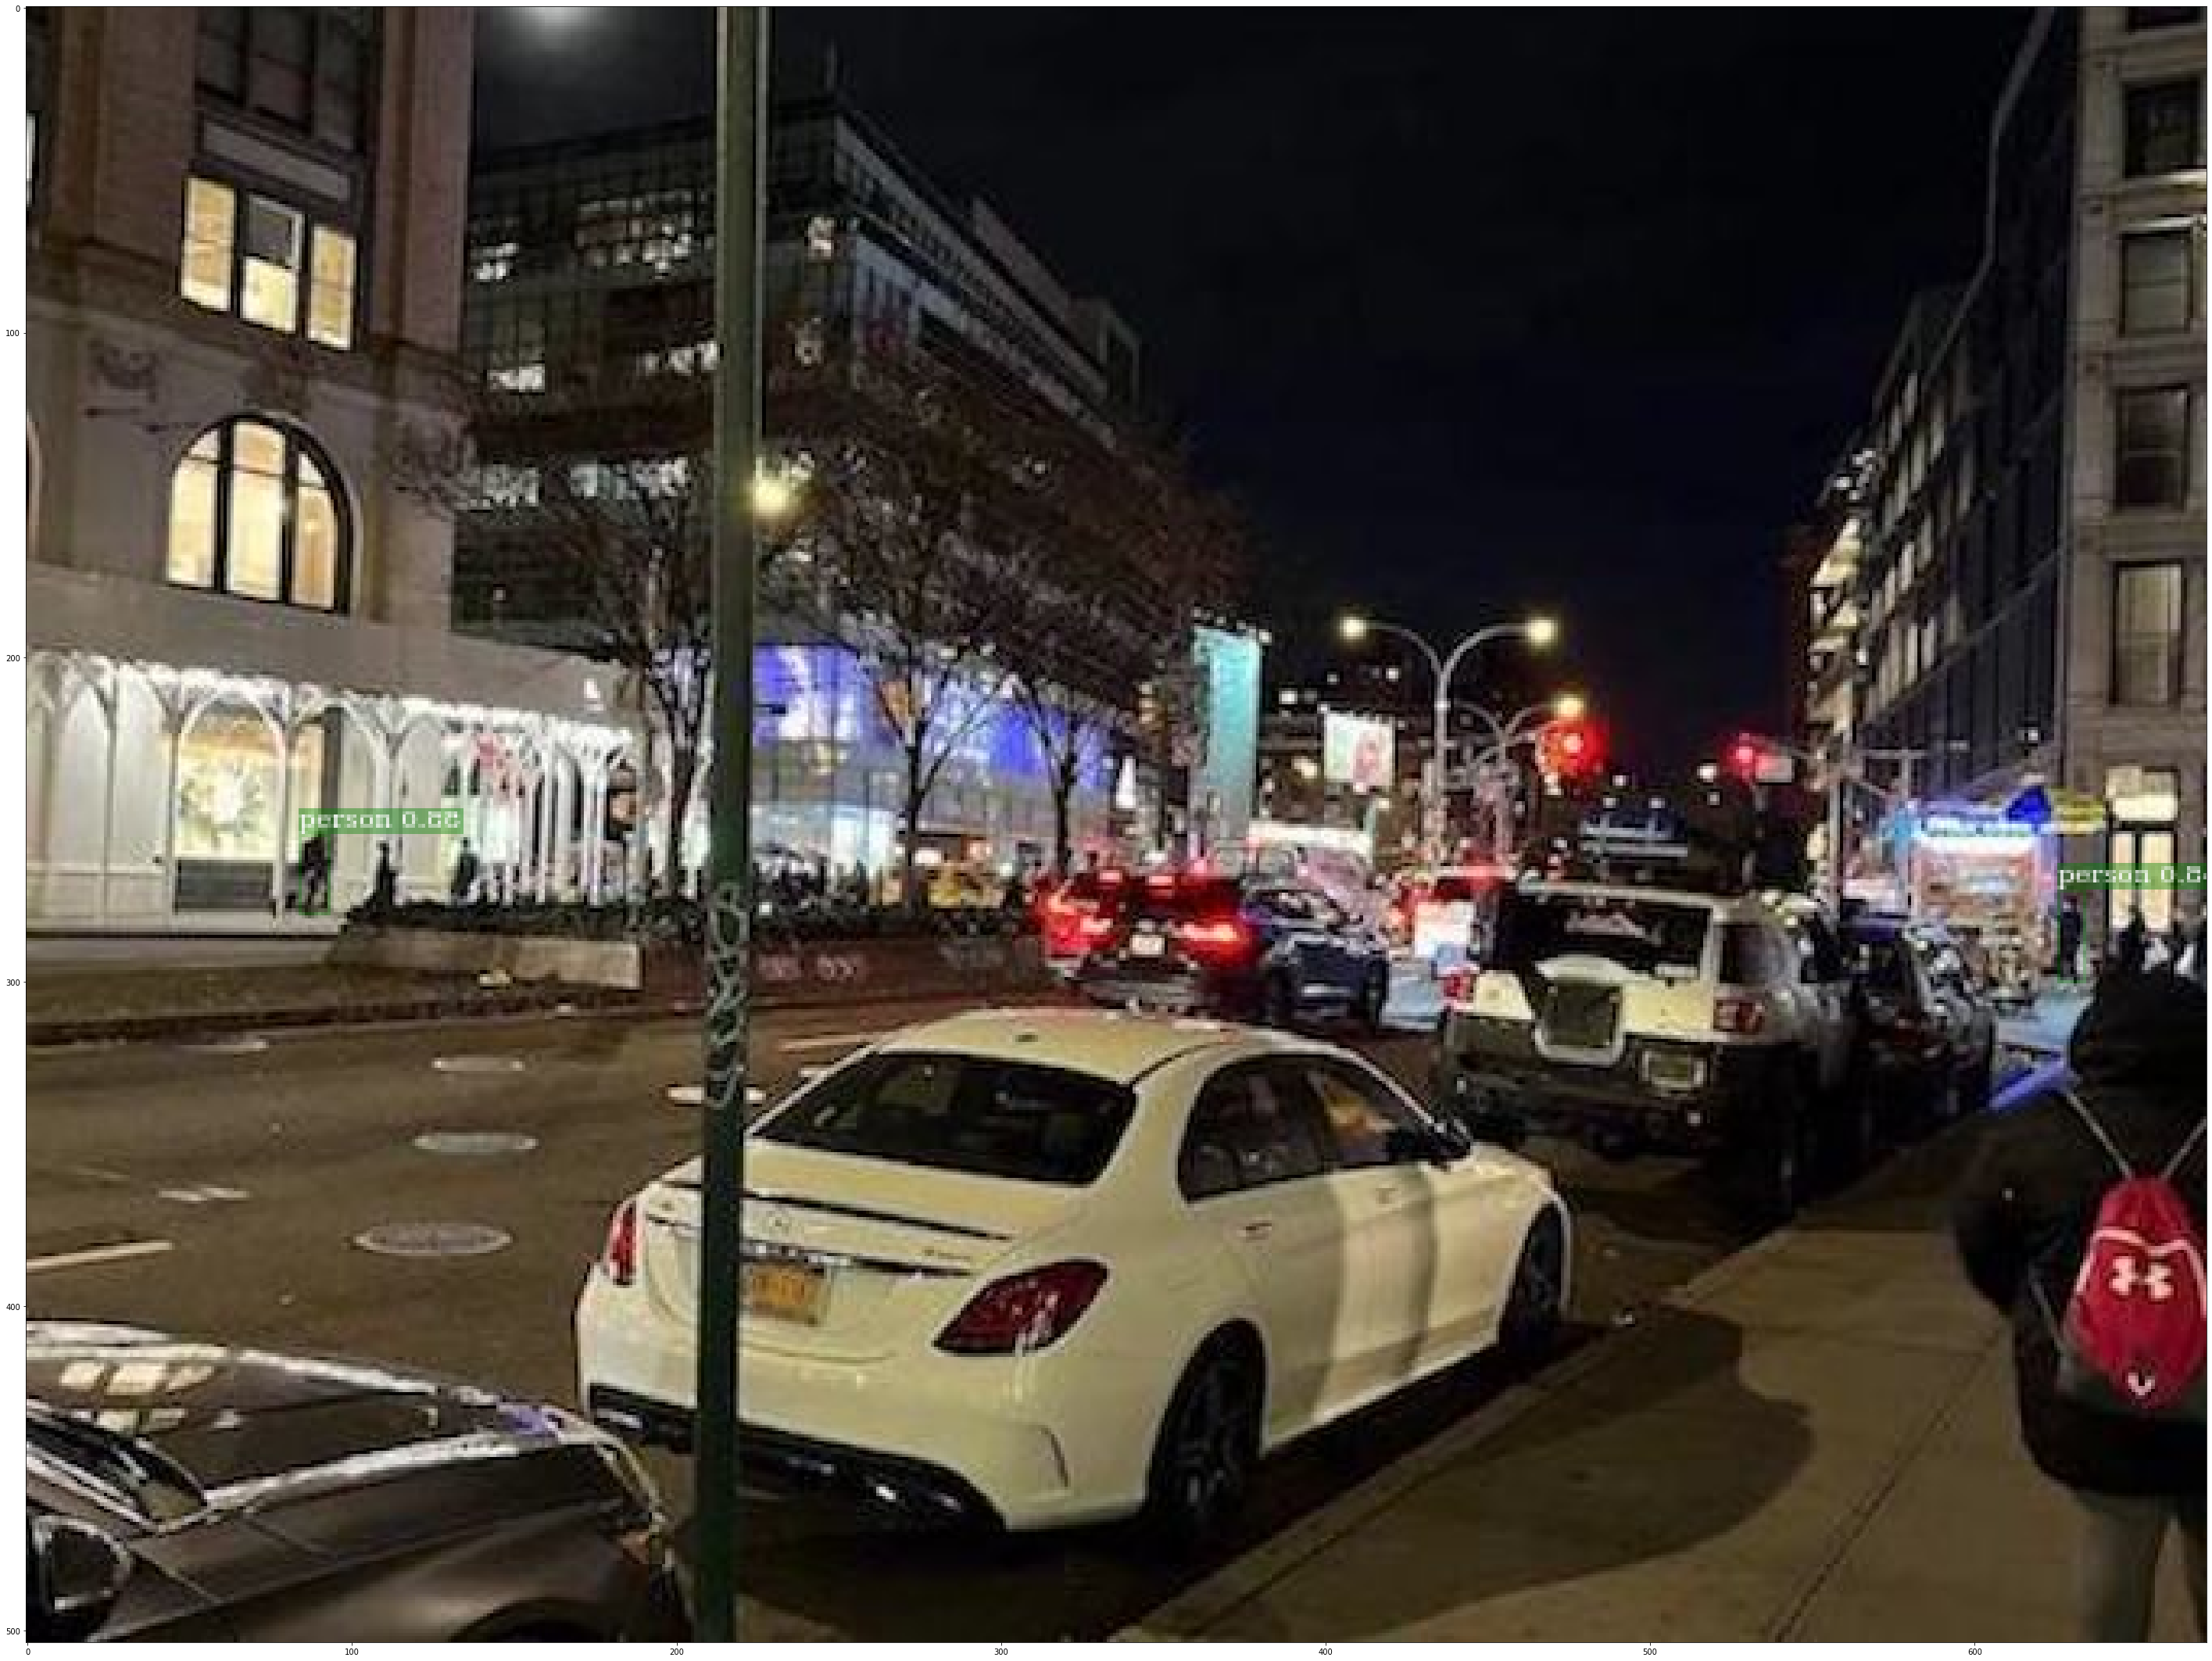

In [ ]:
#show keypoint rcnn R graph
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/keypointrcnnRmodel/%s.png' % image_file))

#faster rcnn X:

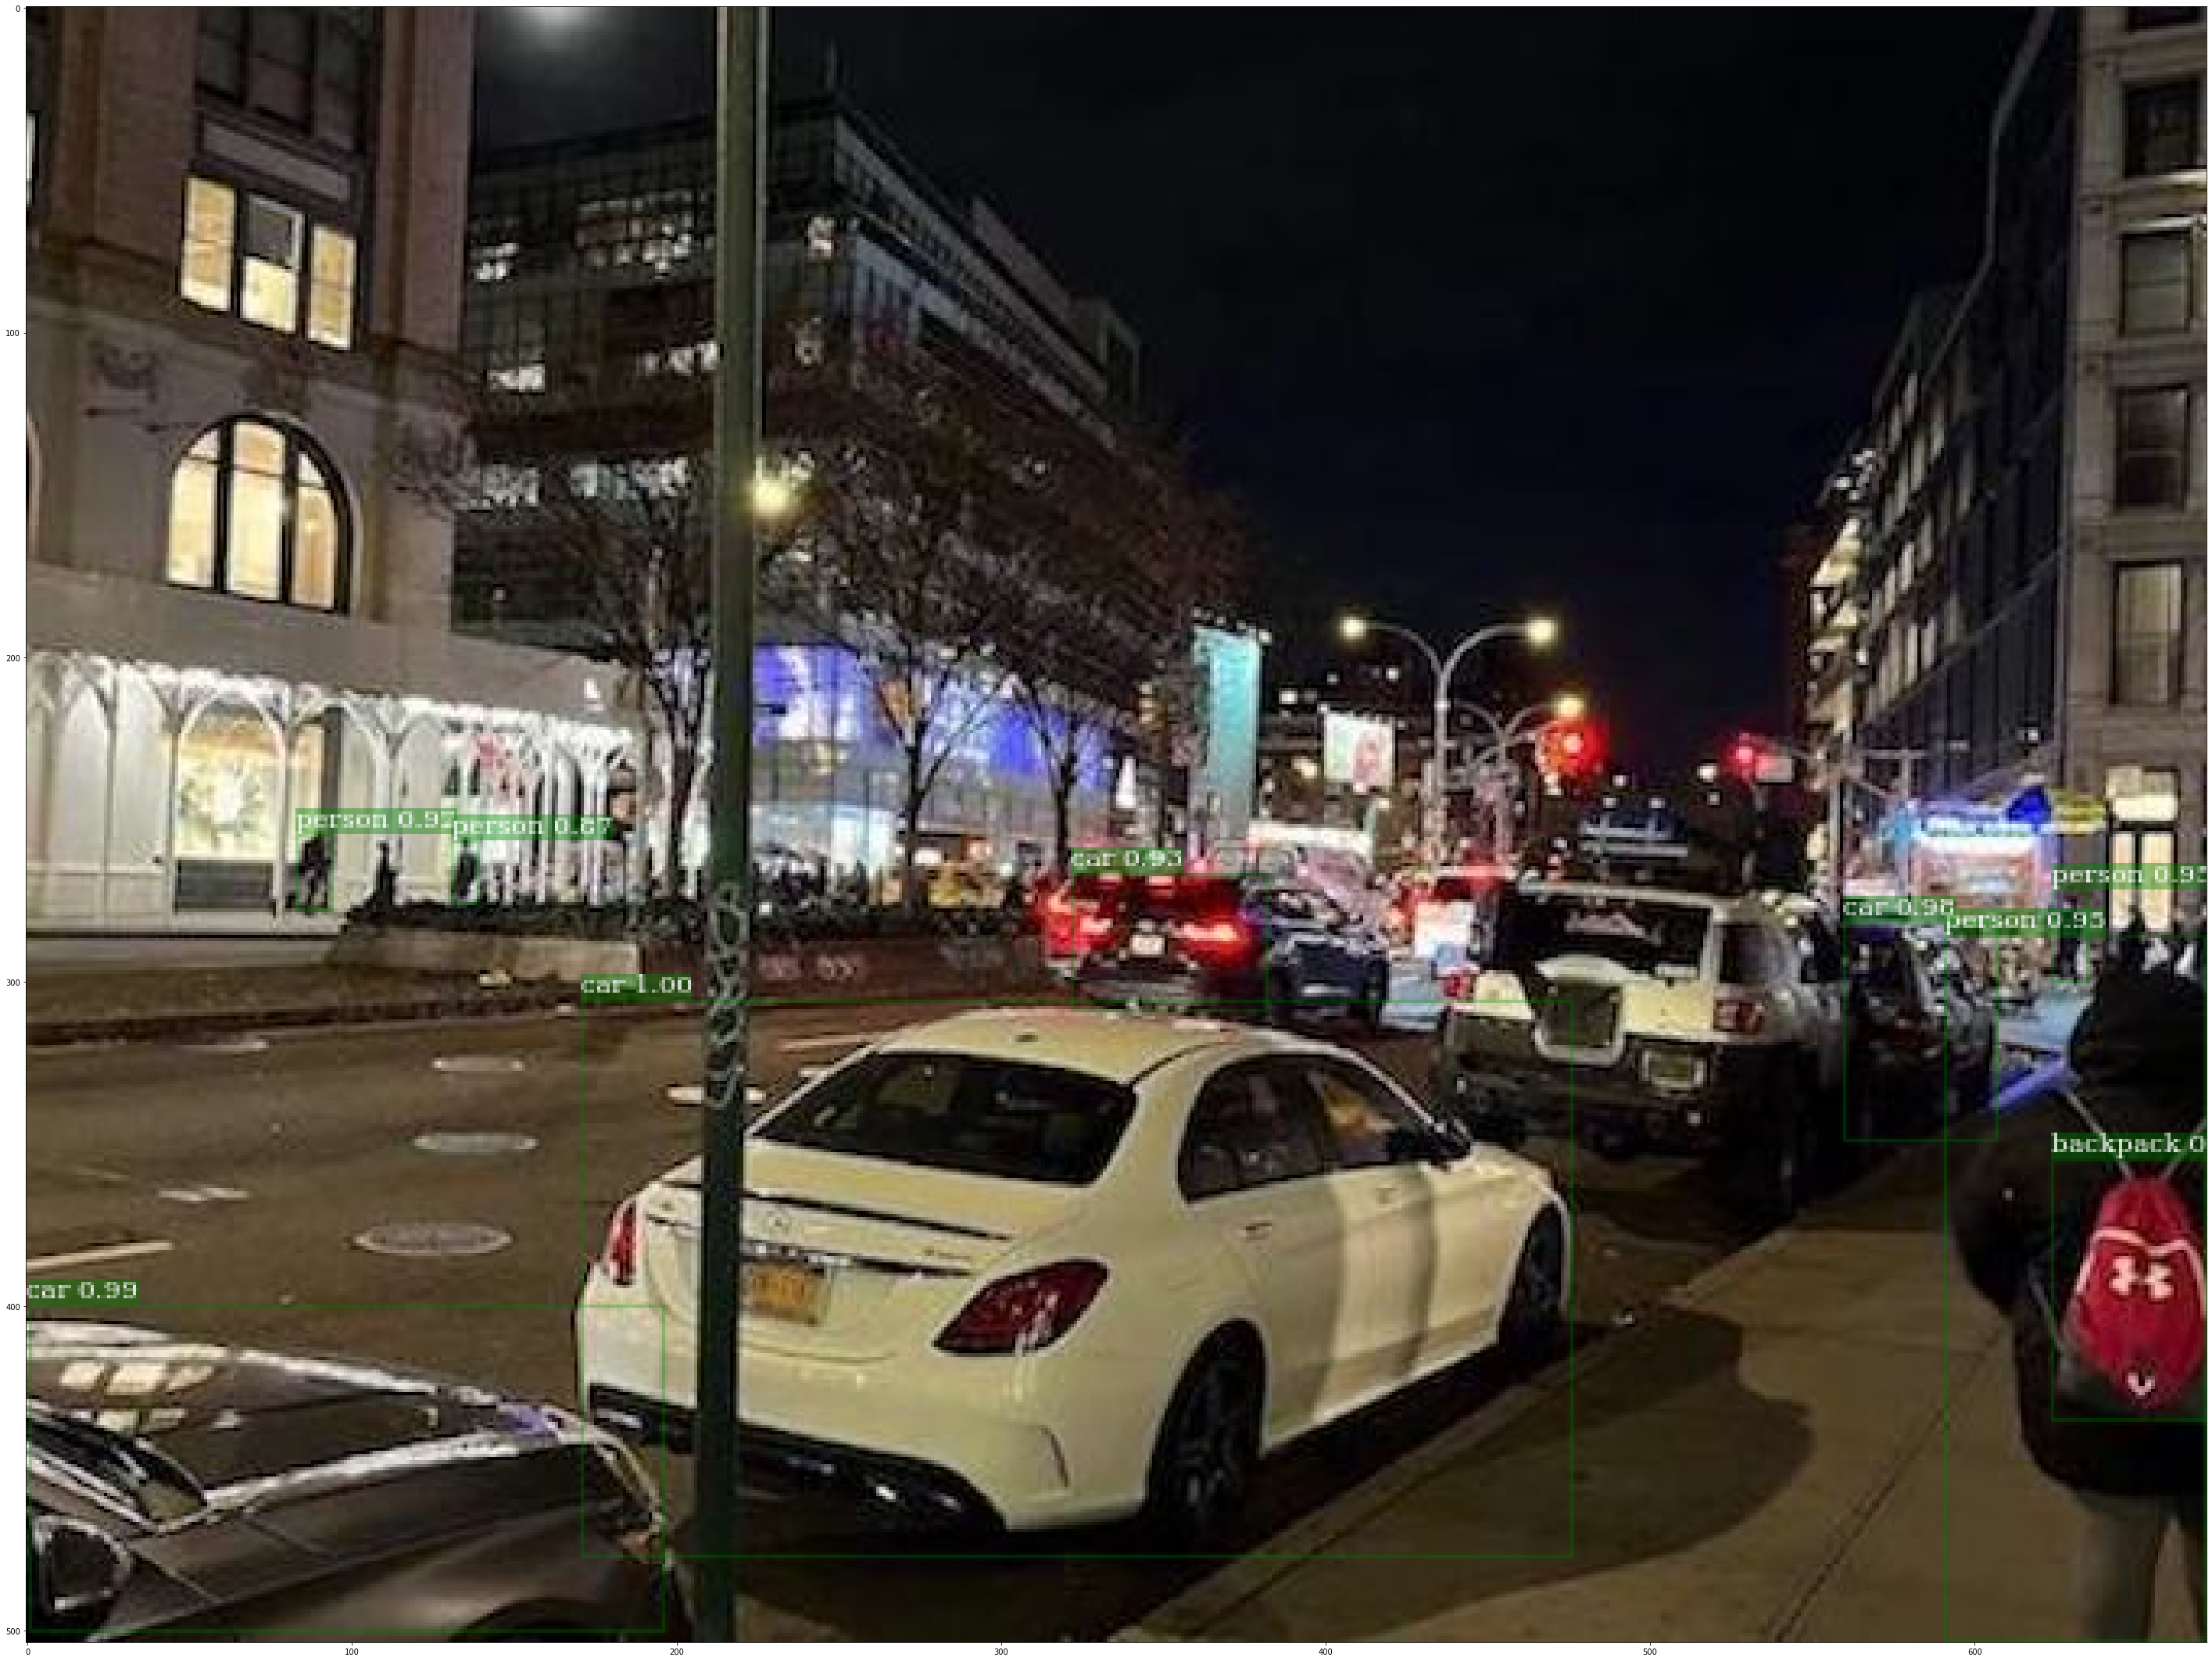

In [ ]:
#show faster rcnn X graph
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/fasterrcnnXmodel/%s.png' % image_file))

#faster rcnn R:

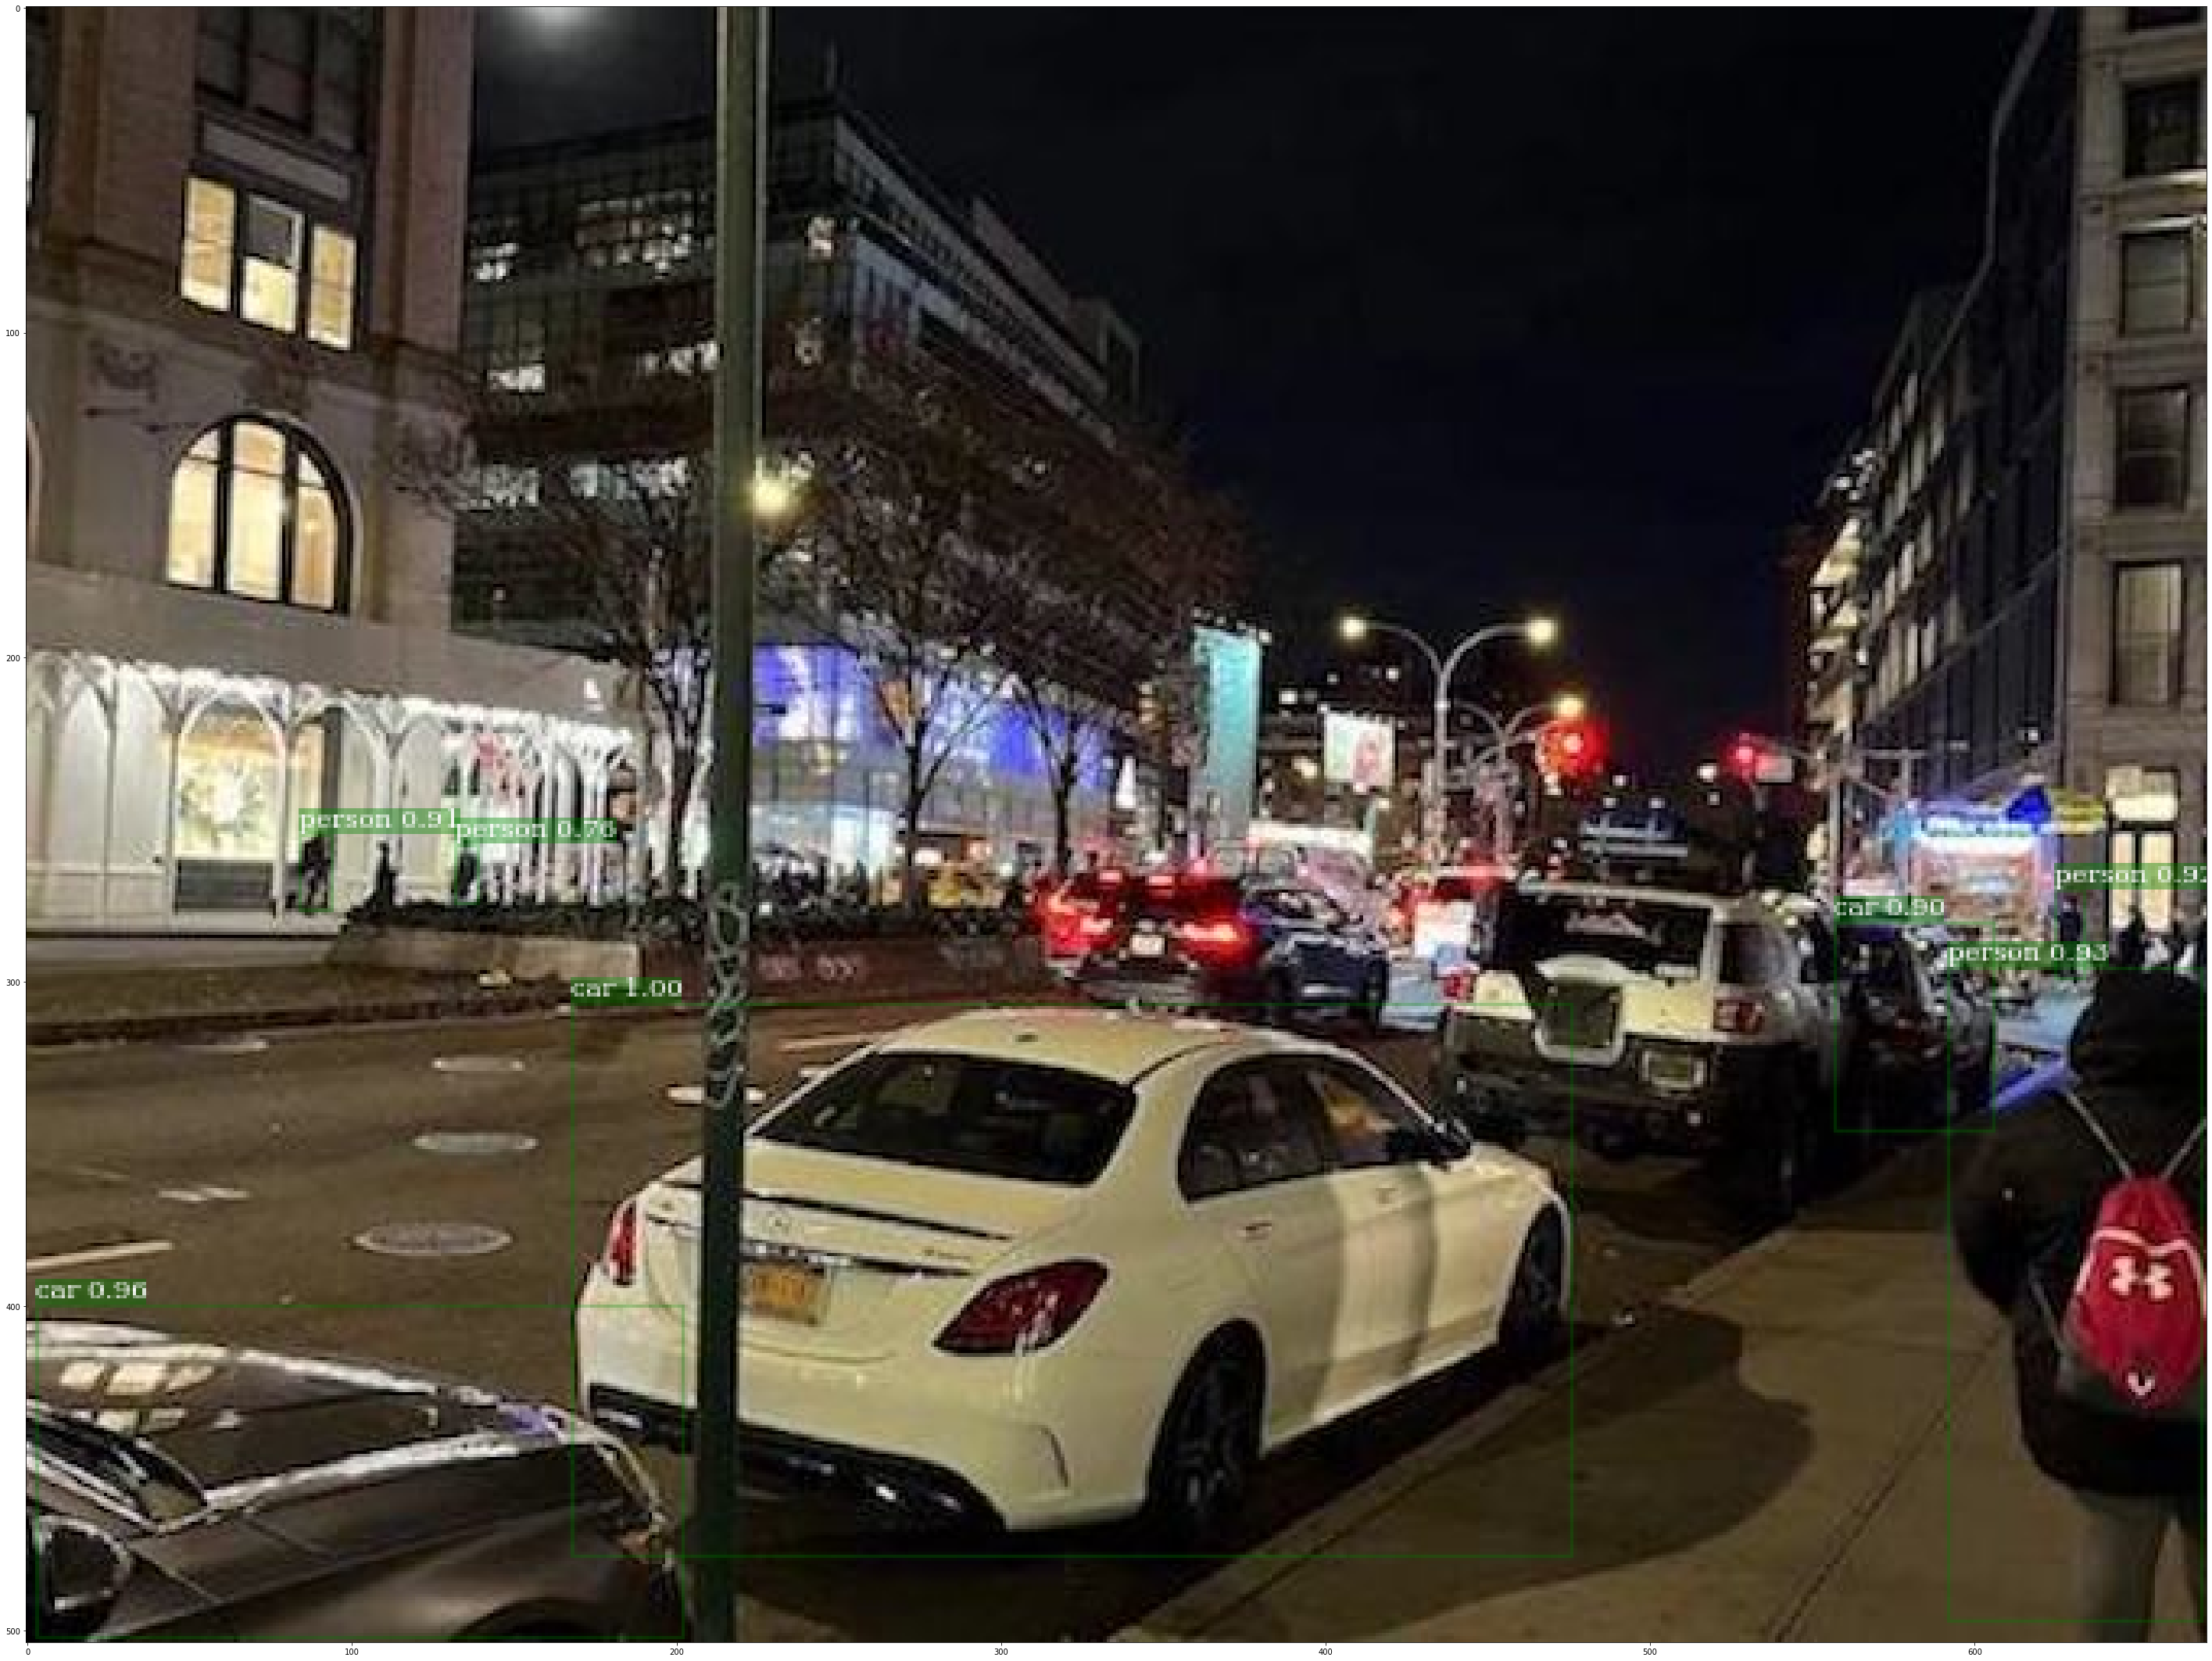

In [ ]:
#show faster rcnn R graph
plt.figure(figsize=(50, 50))
plt.imshow(matplotlib.image.imread('output/fasterrcnnRmodel/%s.png' % image_file))

#Citation
1. https://github.com/tugstugi/dl-colab-notebooks
2. https://github.com/facebookresearch/Detectron
3. https://github.com/facebookresearch/Detectron/tree/main/configs/12_2017_baselines
4. https://github.com/facebookresearch/Detectron/blob/main/MODEL_ZOO.md
5. https://arxiv.org/abs/1703.06870
6. https://arxiv.org/pdf/1703.06870.pdf
7. https://www.igi-global.com/dictionary/region-of-interest/24858


